In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np

# For better visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Cell 2: Load the dataset into pandas dataframe
# Note: Ensure 'Iris.csv' is in the same directory as your notebook
df = pd.read_csv("Datasets/Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Cell 4: Check for missing values and general statistics
print("Missing values:\n", df.isnull().sum())
print("\nData Summary:\n", df.describe())
print("\nShape of the dataset:", df.shape)
print("\nData types:\n", df.dtypes)


Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data Summary:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Shape of the dataset: (150, 6)

Data types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidth

In [6]:

df['Id'] = df['Id'].astype(int)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scaler.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa


In [7]:
# Cell 6: Turn categorical variables into quantitative (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['Species'])
df_encoded.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,0.222222,0.625000,0.067797,0.041667,True,False,False
1,2,0.166667,0.416667,0.067797,0.041667,True,False,False
2,3,0.111111,0.500000,0.050847,0.041667,True,False,False
3,4,0.083333,0.458333,0.084746,0.041667,True,False,False
4,5,0.194444,0.666667,0.067797,0.041667,True,False,False


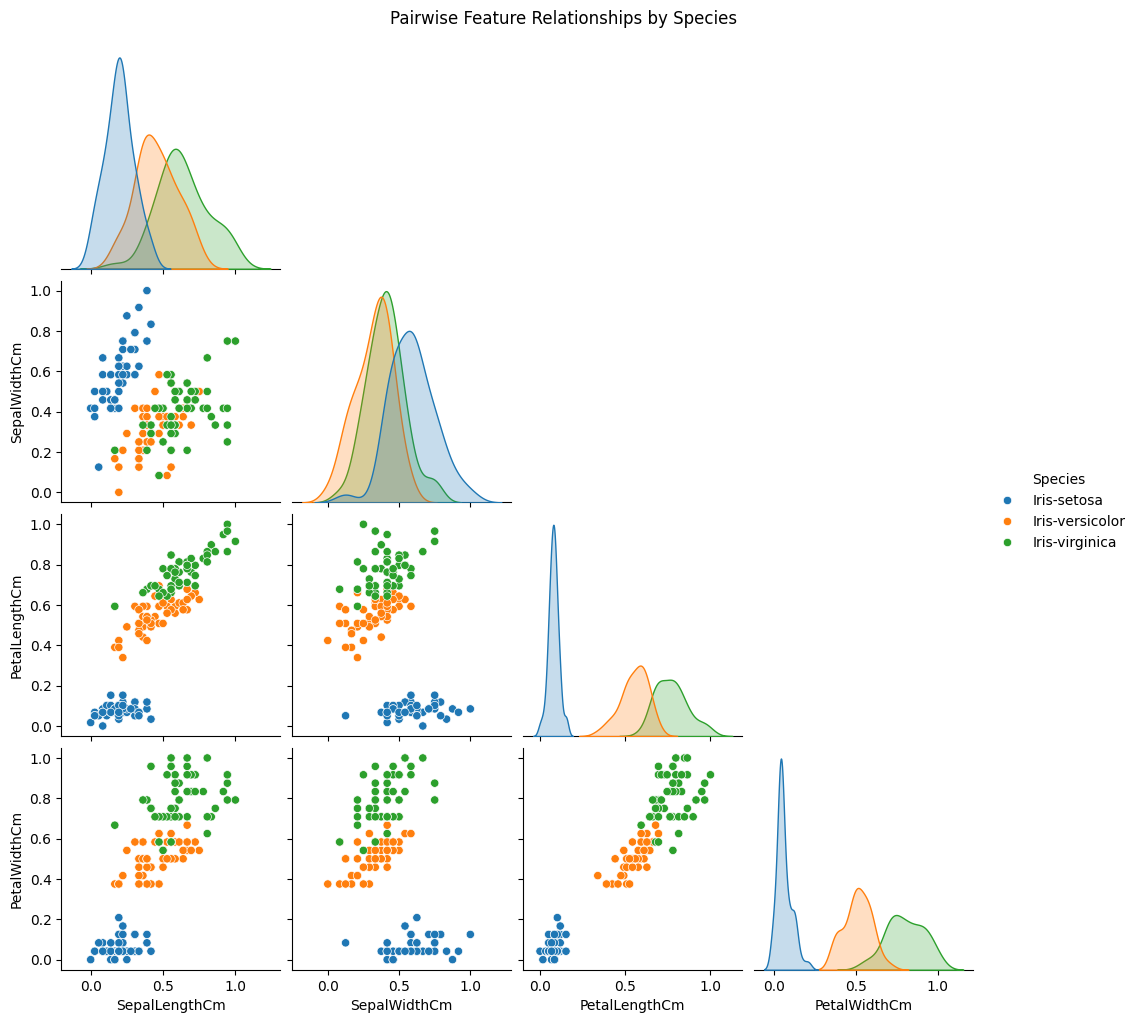

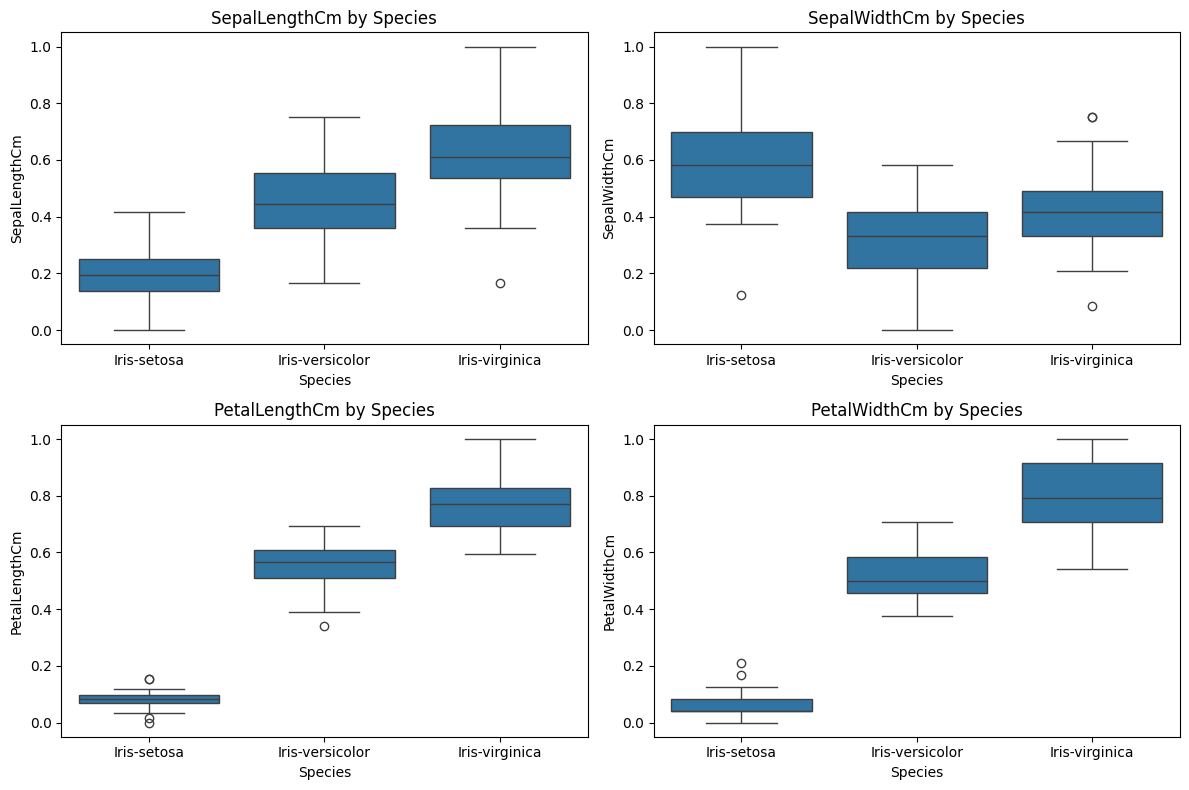

In [9]:
# Cell 5: Visualizations
# 5.1 Pairplot of all numeric features colored by species
sns.pairplot(df.drop(columns="Id"), hue="Species", corner=True)
plt.suptitle("Pairwise Feature Relationships by Species", y=1.02)
plt.show()

# 5.2 Boxplots to spot outliers
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for ax, col in zip(axes.flatten(), ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]):
    sns.boxplot(data=df, y=col, x="Species", ax=ax)
    ax.set_title(f"{col} by Species")
plt.tight_layout()
plt.show()


In [10]:
# Cell 6: Outlier Removal using IQR method on all numeric features
def remove_outliers_iqr(data, columns):
    clean = data.copy()
    for col in columns:
        Q1 = clean[col].quantile(0.25)
        Q3 = clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        clean = clean[(clean[col] >= lower) & (clean[col] <= upper)]
    return clean

numeric_cols = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
df_clean = remove_outliers_iqr(df, numeric_cols)

print(f"Shape before outlier removal: {df.shape}")
print(f"Shape after outlier removal:  {df_clean.shape}")


Shape before outlier removal: (150, 6)
Shape after outlier removal:  (146, 6)


In [12]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...,...
145,146,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,147,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,148,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,149,0.527778,0.583333,0.745763,0.916667,Iris-virginica
